In [1]:
%matplotlib notebook

import os
import sys
sys.path.append("/home/mam588/updated_cilia")
sys.path.append("/home/mam588/dense_trajectory_release_v1.2")

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import cilia.utils.video as video_utils
from cilia.trajectory import distance
from scipy.spatial.distance import squareform
import densetrack

In [2]:
# configuration options for matplotlib
mpl.rcParams['axes.titlesize'] = 'small'
mpl.rcParams['axes.grid'] = False

<IPython.core.display.Javascript object>


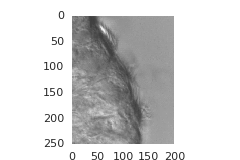

In [3]:
# load video
video = video_utils.read(os.path.realpath("videos/7417-11.avi"))
# show first frame
# plt.figure()
# plt.imshow(video[0], cmap='gray', vmin=0, vmax=255, interpolation='none', aspect='equal')
# select ROI from video
roi = video[:50, 150:400, 300:500]
# show first frame
plt.figure(figsize=(3,2))
plt.imshow(roi[0], cmap='gray', vmin=0, vmax=255, interpolation='none', aspect='equal')
plt.grid(False)

In [4]:
# compute dense trajectories for ROI
tracks = densetrack.densetrack(roi, track_length=8)
print(len(tracks))

1499


In [5]:
# compute distances between trajectories
dist = distance.pdist(tracks['trajectory'])
squaredist = squareform(dist)

<IPython.core.display.Javascript object>


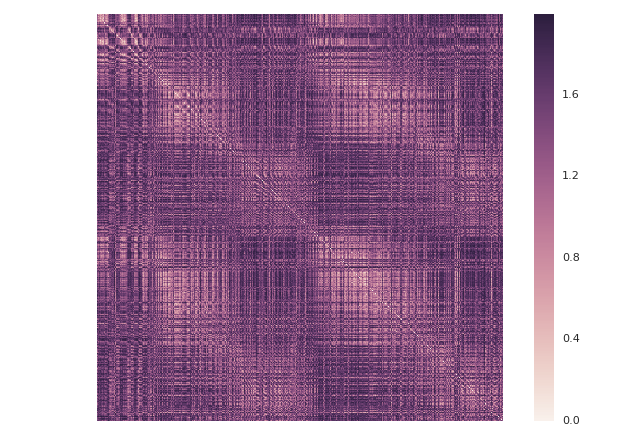

In [6]:
# plot distance matrix
fig, ax = plt.subplots(tight_layout=True)
sns.heatmap(squaredist, ax=ax, xticklabels=False, yticklabels=False, square=True)

<IPython.core.display.Javascript object>


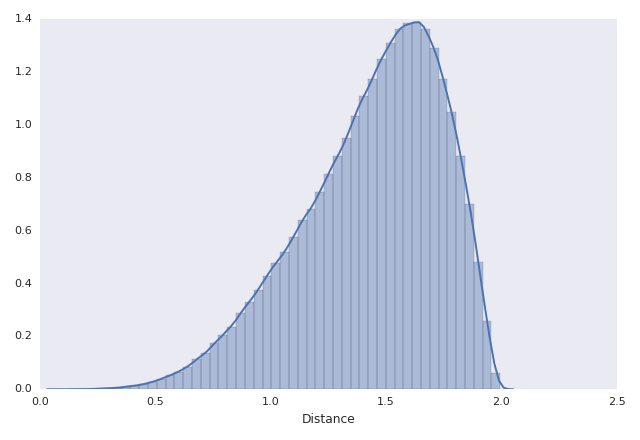

In [7]:
# plot histogram of distances
fig, ax = plt.subplots(tight_layout=True)
sns.distplot(dist, axlabel="Distance", ax=ax)

In [8]:
# trajectories with the smallest distance (ignoring diagonal)
np.fill_diagonal(squaredist, np.inf)
t1, t2 = np.unravel_index(squaredist.argmin(), squaredist.shape)

<IPython.core.display.Javascript object>


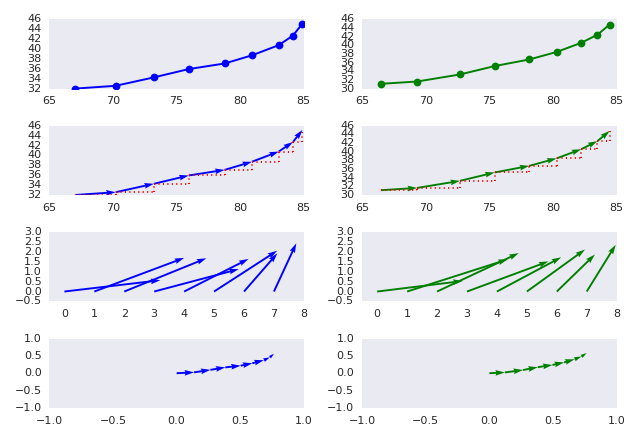

In [9]:
# show two trajectories
fig, ax = plt.subplots(4, 2, tight_layout=True)

# plot first row
ax[0, 0].plot(*tracks['coords'][t1].T, '-o', c='b')
ax[0, 1].plot(*tracks['coords'][t2].T, '-o', c='g')

for i, (t, c) in enumerate(zip((t1, t2), ('b', 'g'))):
    # plot second row
    xys = tracks['coords'][t]
    disp = xys[1:] - xys[:-1]  # displacement vectors
    ax[1, i].quiver(xys[:-1,0], xys[:-1,1], disp[:, 0], disp[:, 1], scale_units='xy', angles='xy', scale=1, color=c)
    # dotted lines
    for (x1, y1), (x2, y2) in zip(xys[:-1], xys[1:]):
        ax[1, i].plot([x1, x2], [y1, y1], ':', c='r')
        ax[1, i].plot([x2, x2], [y1, y2], ':', c='r')
    
    # plot third row
    ax[2, i].set_xlim(-0.5, 8)
    ax[2, i].set_ylim(-0.5, 3)
    ax[2, i].quiver(disp[:, 0], disp[:, 1], scale_units='xy', angles='xy', scale=1, color=c)
    
    disp = tracks['trajectory'][t]
    xy = np.cumsum(np.vstack(([[0, 0]], disp)), axis=0)
    ax[3, i].set_xlim(-1, 1)
    ax[3, i].set_ylim(-1, 1)
#     ax[3, i].set_aspect('equal')
    ax[3, i].quiver(xy[:-1, 0], xy[:-1, 1], disp[:, 0], disp[:, 1], scale_units='xy', angles='xy', scale=1, color=c)


plt.show()